# Classification Dataset= Loan Status.

# Data Defination 
Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.

In [1]:
#Load the librares
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df=pd.read_csv("loan_status_dataset.csv")

In [3]:
#EDA (Head)
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

Conclusion=The dataset has been loaded and there is no need of modification in terms of col name but delete unwanted col Loan_ID is required.

In [4]:
#Delete unwanted col
del df["Loan_ID"]

In [5]:
#EDA (Tail)
df.tail()

Gender Married Dependents Education Self_Employed  ApplicantIncome  \
609  Female      No          0  Graduate            No             2900   
610    Male     Yes         3+  Graduate            No             4106   
611    Male     Yes          1  Graduate            No             8072   
612    Male     Yes          2  Graduate            No             7583   
613  Female      No          0  Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N

Conclusion=Unwanted col is been deleted.

In [6]:
#EDA (Shape)
df.shape

(614, 12)

Conclsuion=There are 614 rows and 12 cols.

In [7]:
#EDA (Size)
df.size

7368

Conclusion=There are 7368 data pts.

In [8]:
#EDA (Cols)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Conclusion=Target col is Loan_Status.

In [9]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Conclusion=There are missing values and dtype matches with data hence there is no need of change of any dtype. 

In [10]:
#EDA (Describe)
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

Conlsuion=There is diffrence in medain and mean hence there is skewness in the dataset. 

In [11]:
#EDA (Skewnes)
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Conclusion=There is skewness present.

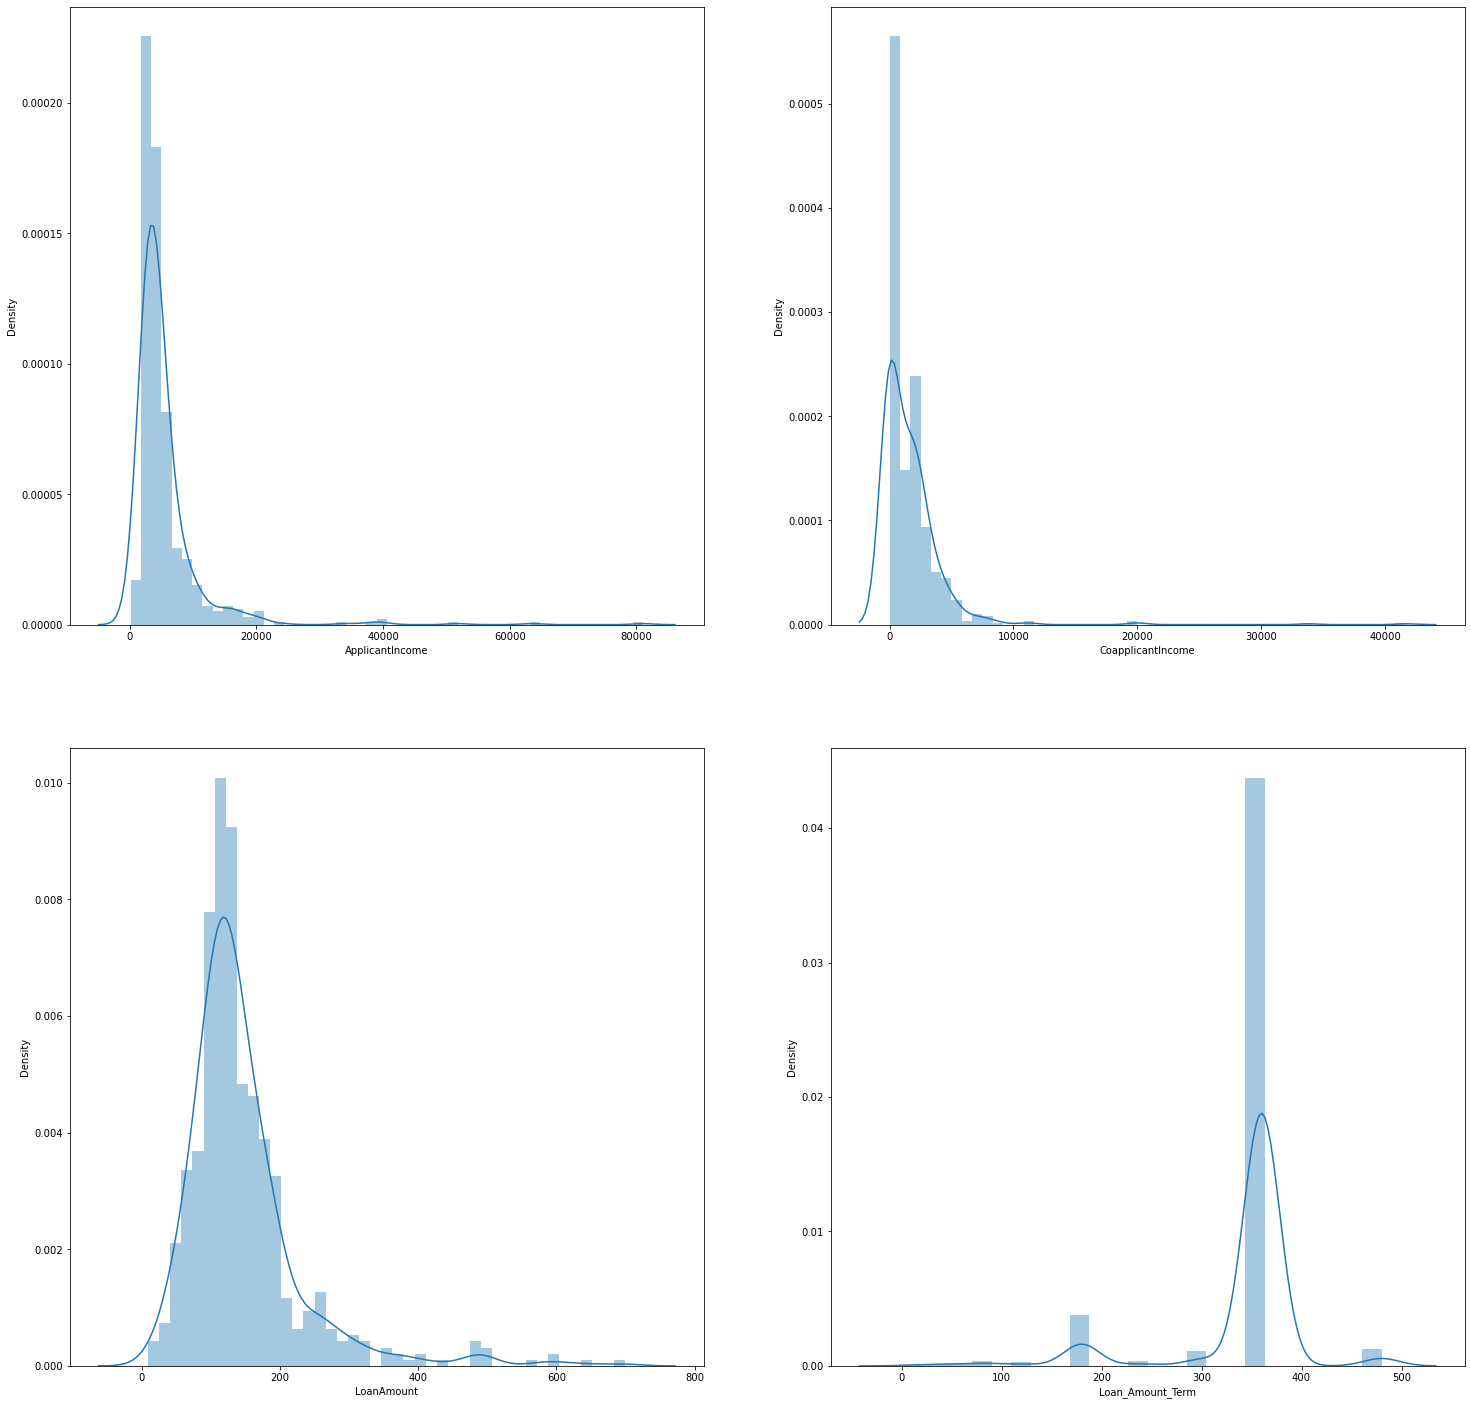

In [12]:
#Data visulization (Numeric data)
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.distplot(df[col],ax=sub)

Conclusion=There is skewness.

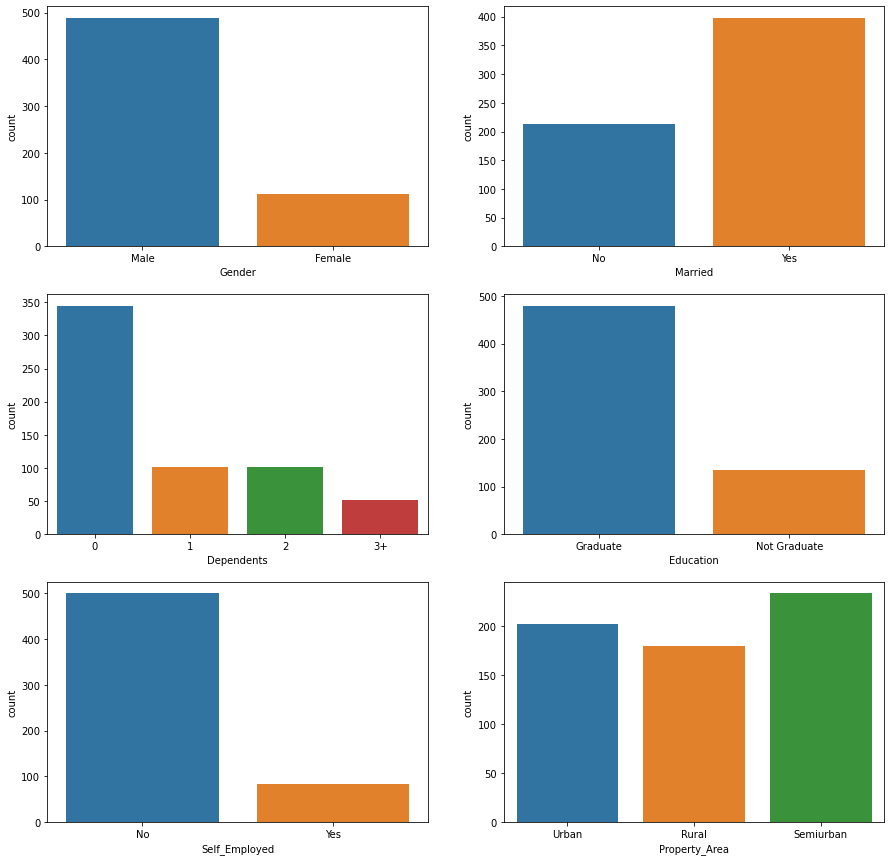

In [13]:
#Data visulization (Cat col)
df_object=df.select_dtypes(exclude=np.number)
df_object_col=df_object.columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=[15,15])
for col,sub in zip(df_object_col,ax.flatten()):
    sns.countplot(df[col],ax=sub)

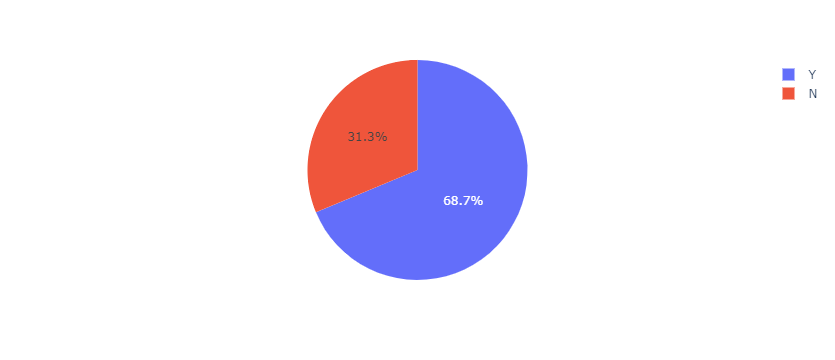

In [14]:
#Data visulization (Target col)
px.pie(df,names=df["Loan_Status"])

Conclusion=There are 31.3% of No and 68.7% of yes.#Outliers

In [15]:
#Missing values
missing_nu=KNNImputer(missing_values=np.nan,n_neighbors=5)
missing_ob=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
nu=missing_nu.fit_transform(df_numeric)
df_nu=pd.DataFrame(data=nu,columns=df_numeric.columns)
o=missing_ob.fit_transform(df_object)
df_o=pd.DataFrame(data=o,columns=df_object.columns)
df=pd.concat([df_nu,df_o],axis=1)

In [16]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.678324
Loan_Amount_Term    -2.379668
Credit_History      -1.922231
dtype: float64

In [17]:
#Missing values
df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

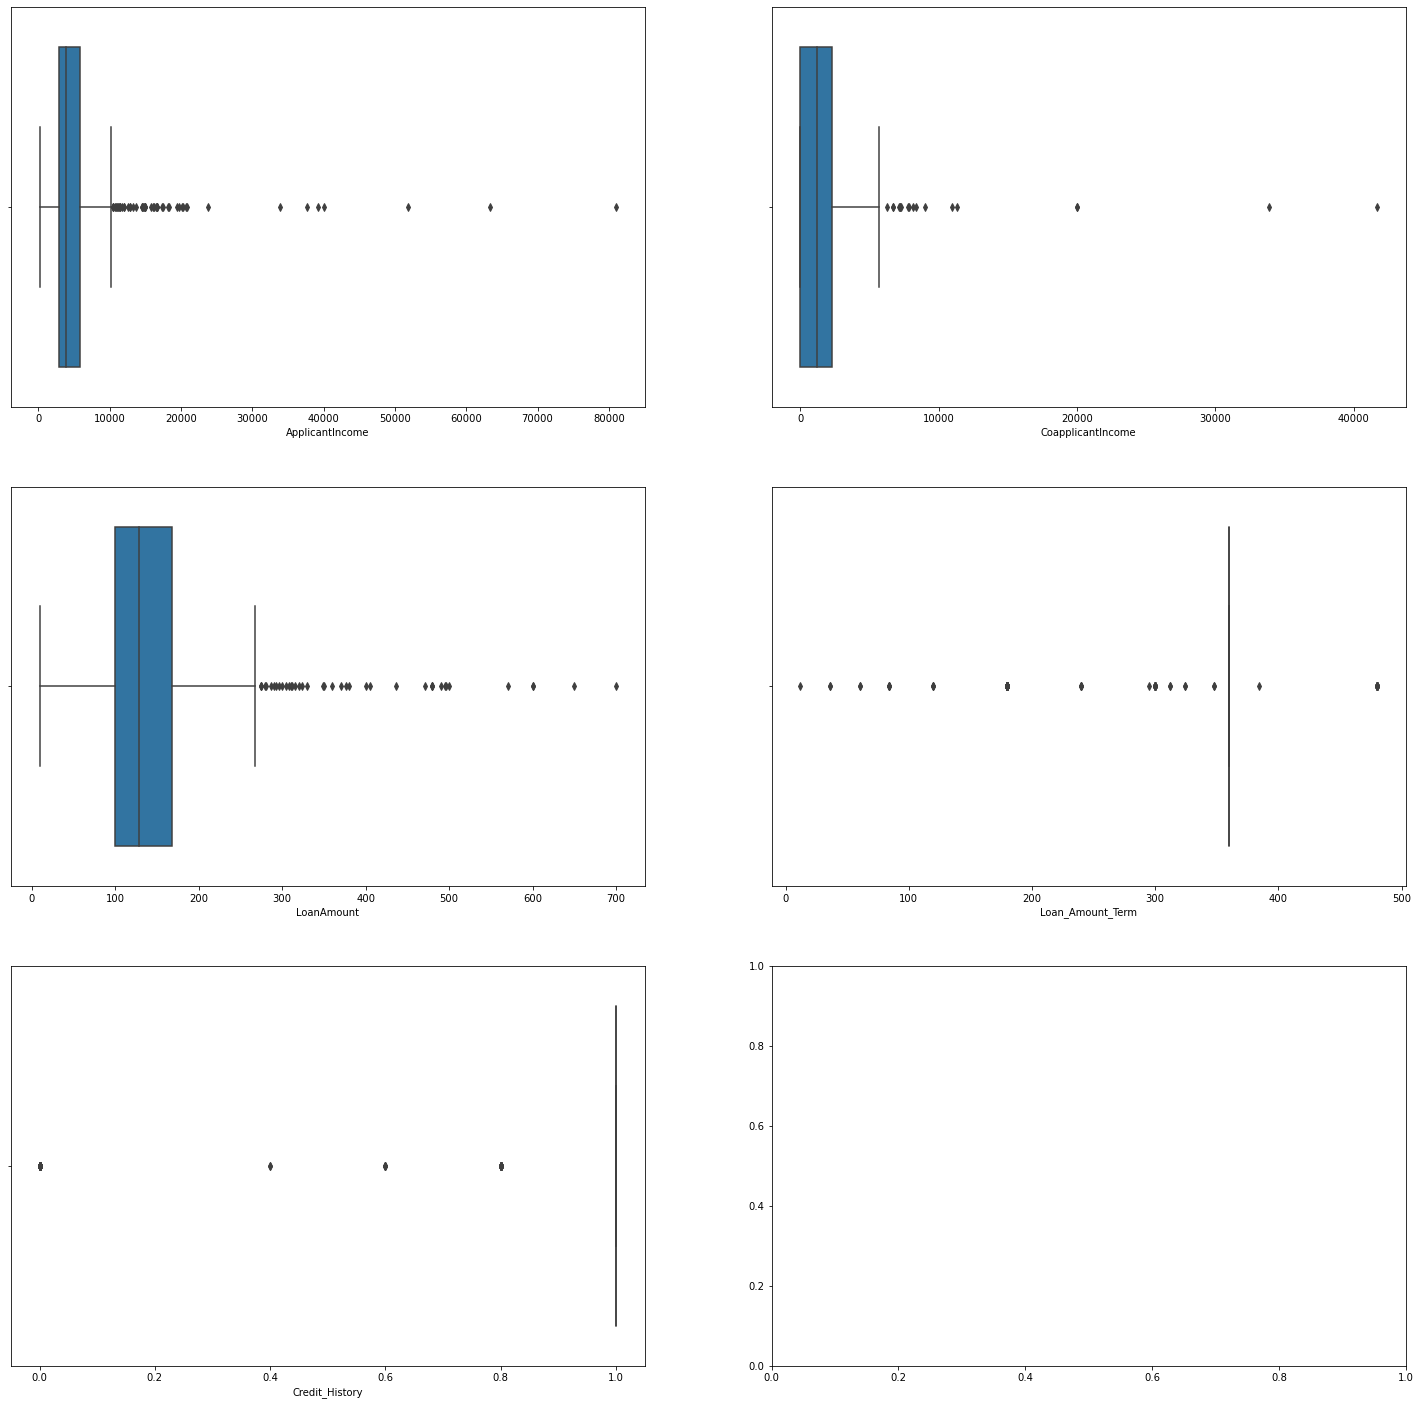

In [18]:
#Outliers
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub,orient="h")

Conclusion=There are outliers and we need to treat them

In [19]:
#Treattment of outliers
df_ot=df_numeric.columns
for col in df_ot:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    mx=q3+(1.5*iqr)
    mn=q1-(1.5*iqr)
    df[col]=np.where(df[col]>mx,mx,df[col])

#Loan term amount
q1=df["Loan_Amount_Term"].quantile(0.25)
q3=df["Loan_Amount_Term"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Loan_Amount_Term"]=np.where(df["Loan_Amount_Term"]>mn,mn,df["Loan_Amount_Term"])

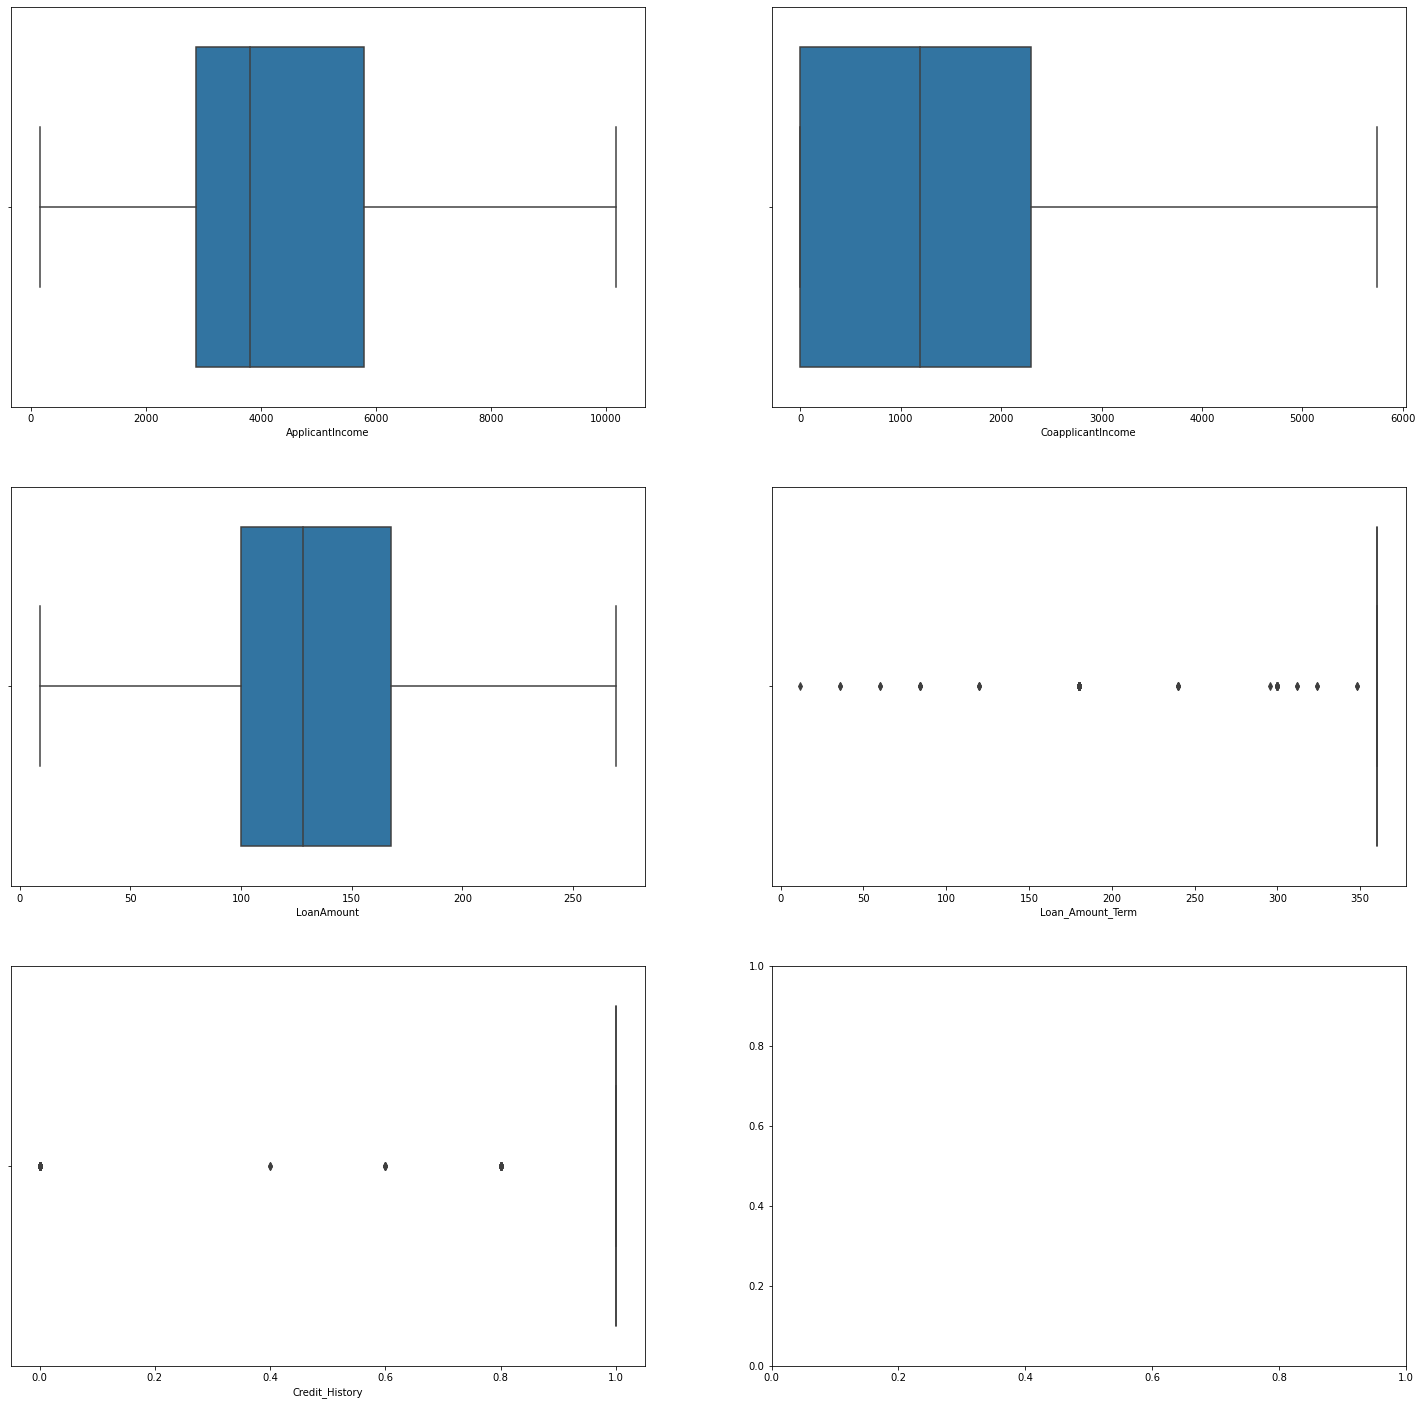

In [20]:
#Outliers
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub,orient="h")

In [21]:
#Cat data tretment
df=pd.get_dummies(df,drop_first=True)
df.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0       147.8             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0   
1              0                       0                  0   
2              0                       0                  1   
3              0                       1                  0   
4              0                       0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  
0                        0                    1              1  
1                        0                    0              0  
2                        0                    1              1  
3                        0                    1              1  
4                        0                    1              1

In [22]:
#Data Standardization
X=df.drop("Loan_Status_Y",axis=1)
y=df["Loan_Status_Y"]
ss=StandardScaler()
scaledX=ss.fit_transform(X)

In [23]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

# Logistic Regression

In [24]:
#Algoritm
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [25]:
#Traning and testing score
print("Traning  score is",LR.score(X_train,y_train))
print("Testing score is",LR.score(X_test,y_test))

Traning  score is 0.8135198135198135
Testing score is 0.7891891891891892


Conclusion=Traning and testing is good.

In [81]:
#Performance Parameters
predict_LR=LR.predict(X_test)
print("Accuracy is",metrics.accuracy_score(y_test,predict_LR))
print("Precision is",metrics.precision_score(y_test,predict_LR))
print("Recall is",metrics.recall_score(y_test,predict_LR))
print("f1score is",metrics.f1_score(y_test,predict_LR))

<IPython.core.display.Javascript object>

Accuracy is 0.7891891891891892


<IPython.core.display.Javascript object>

Precision is 0.7612903225806451


<IPython.core.display.Javascript object>

Recall is 0.9833333333333333


<IPython.core.display.Javascript object>

f1score is 0.8581818181818182


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

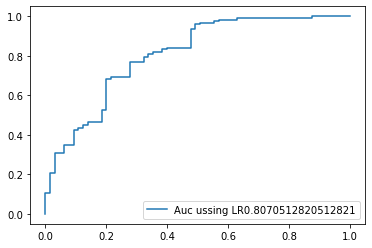

In [27]:
#AUC
predict_LR_pro=LR.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_LR_pro)
AUC=metrics.roc_auc_score(y_test,predict_LR_pro)
plt.plot(fpr,tpr,label="Auc ussing LR"+str(AUC))
plt.legend(loc=4)
plt.show();

Consluion=The auc value is good enough.

# KNN

In [28]:
#Algoritm
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
#Traning and testing score
print("Traning  score is",KNN.score(X_train,y_train))
print("Testing score is",KNN.score(X_test,y_test))

Traning  score is 0.7552447552447552
Testing score is 0.5621621621621622


Conclusion=The traning score is good but the testing score is not and hence do hyperparametric tunning

In [80]:
#Performance Parameters
predict_KNN=KNN.predict(X_test)
print("Accuracy is",metrics.accuracy_score(y_test,predict_KNN))
print("Precision is",metrics.precision_score(y_test,predict_KNN))
print("Recall is",metrics.recall_score(y_test,predict_KNN))
print("f1score is",metrics.f1_score(y_test,predict_KNN))

<IPython.core.display.Javascript object>

Accuracy is 0.5621621621621622


<IPython.core.display.Javascript object>

Precision is 0.6308724832214765


<IPython.core.display.Javascript object>

Recall is 0.7833333333333333


<IPython.core.display.Javascript object>

f1score is 0.6988847583643122


Conclsuion=The performance parameters are not good.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

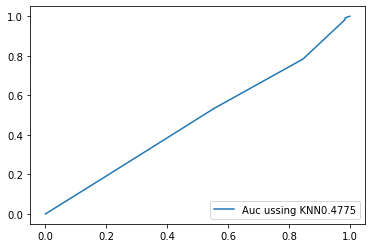

In [31]:
#AUC
predict_KNN_pro=KNN.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_KNN_pro)
AUC=metrics.roc_auc_score(y_test,predict_KNN_pro)
plt.plot(fpr,tpr,label="Auc ussing KNN"+str(AUC))
plt.legend(loc=4)
plt.show();

Conclusion=The AUC value os very less.

In [32]:
#Hyperparametric tunning
#Hyperparams
n_neighbors=list(range(1,15))
weights=['uniform','distance']
metric=['minkowski',"euclidean","manhattan"]
hyperparams=dict(n_neighbors=list(range(1,15)),
weights=['uniform','distance'],
metric=['minkowski',"euclidean","manhattan"])
#Gridsearch
gridserach=GridSearchCV(KNN,param_grid=hyperparams,cv=10)
#Fit
gridserach.fit(X_train,y_train)
#Best estimator
gridserach.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [33]:
#Algoritm
KNN_HP=KNeighborsClassifier(n_neighbors=13)
KNN_HP.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [34]:
#Traning and testing score
print("Traning  score is",KNN_HP.score(X_train,y_train))
print("Testing score is",KNN_HP.score(X_test,y_test))

Traning  score is 0.7249417249417249
Testing score is 0.6108108108108108


Conclusion=Improvemnt in testing score.

In [79]:
#Performance Parameters
predict_KNN_HP=KNN_HP.predict(X_test)
print("Accuracy is",metrics.accuracy_score(y_test,predict_KNN_HP))
print("Precision is",metrics.precision_score(y_test,predict_KNN_HP))
print("Recall is",metrics.recall_score(y_test,predict_KNN_HP))
print("f1score is",metrics.f1_score(y_test,predict_KNN_HP))

<IPython.core.display.Javascript object>

Accuracy is 0.6108108108108108


<IPython.core.display.Javascript object>

Precision is 0.6411764705882353


<IPython.core.display.Javascript object>

Recall is 0.9083333333333333


<IPython.core.display.Javascript object>

f1score is 0.7517241379310344


Conclusion=The performance paramters have improved.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

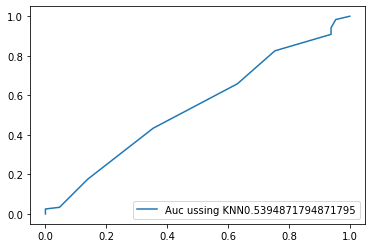

In [36]:
#AUC
predict_KNN_pro_=KNN_HP.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_KNN_pro_)
AUC=metrics.roc_auc_score(y_test,predict_KNN_pro_)
plt.plot(fpr,tpr,label="Auc ussing KNN"+str(AUC))
plt.legend(loc=4)
plt.show();

Concluion=The AUC value has been increased but it is not good enough. Its better to not consider this algoritm at all.

# Naive Bayes

In [37]:
#Algoritm
NB=BernoulliNB()
NB.fit(X_train,y_train)

BernoulliNB()

In [38]:
#Traning and testing score
print("Traning  score is",NB.score(X_train,y_train))
print("Testing score is",NB.score(X_test,y_test))

Traning  score is 0.8181818181818182
Testing score is 0.7837837837837838


In [78]:
#Performance parameters
predict_NB=NB.predict(X_test)
print("Accuracy is",metrics.accuracy_score(y_test,predict_NB))
print("Precision is",metrics.precision_score(y_test,predict_NB))
print("Recall is",metrics.recall_score(y_test,predict_NB))
print("f1score is",metrics.f1_score(y_test,predict_NB))

<IPython.core.display.Javascript object>

Accuracy is 0.7837837837837838


<IPython.core.display.Javascript object>

Precision is 0.7564102564102564


<IPython.core.display.Javascript object>

Recall is 0.9833333333333333


<IPython.core.display.Javascript object>

f1score is 0.8550724637681159


Conclusion=The performance parameters are ok.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

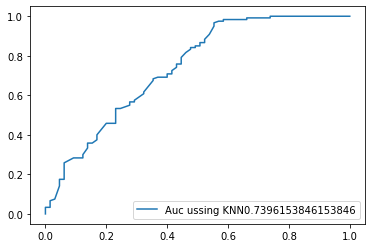

In [40]:
#AUC
predict_NB_pro=NB.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_NB_pro)
AUC=metrics.roc_auc_score(y_test,predict_NB_pro)
plt.plot(fpr,tpr,label="Auc ussing KNN"+str(AUC))
plt.legend(loc=4)
plt.show();

Conclusion=The AUC value is not more than that of Logistic Regression.

# SVM

In [41]:
#Algoritm
SVM=SVC(probability=True)
SVM.fit(X_train,y_train)

SVC(probability=True)

In [42]:
#Traning and testing score
print("Traning  score is",SVM.score(X_train,y_train))
print("Testing score is",SVM.score(X_test,y_test))

Traning  score is 0.703962703962704
Testing score is 0.6486486486486487


Conclusion=The testing and traning scores are ok.

In [77]:
#Performance Parameters
predict_SVM=SVM.predict(X_test)
print("Accuracy is",metrics.accuracy_score(y_test,predict_SVM))
print("Precision is",metrics.precision_score(y_test,predict_SVM))
print("Recall is",metrics.recall_score(y_test,predict_SVM))
print("f1score is",metrics.f1_score(y_test,predict_SVM))

<IPython.core.display.Javascript object>

Accuracy is 0.6486486486486487


<IPython.core.display.Javascript object>

Precision is 0.6486486486486487


<IPython.core.display.Javascript object>

Recall is 1.0


<IPython.core.display.Javascript object>

f1score is 0.7868852459016393



Conclusion=The Performance parameters are ok.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

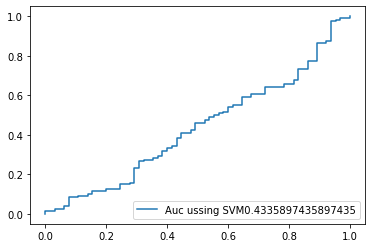

In [44]:
#AUC
predict_SVM_pro=SVM.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_SVM_pro)
AUC=metrics.roc_auc_score(y_test,predict_SVM_pro)
plt.plot(fpr,tpr,label="Auc ussing SVM"+str(AUC))
plt.legend(loc=4)
plt.show();

Conclusion=AUC value is very poor.

# Decision Tree

In [45]:
#Algorthm
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
#Traning and Testing score
print("Traning score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Traning score is 0.9976689976689976
Testing score is 0.6918918918918919


Conclusion=The traning score is very good but the testing score is not.

In [76]:
#Performance parameters
predict_DT=DT.predict(X_test)
print("Accuracy is",metrics.accuracy_score(y_test,predict_DT))
print("Precision is",metrics.precision_score(y_test,predict_DT))
print("Recall is",metrics.recall_score(y_test,predict_DT))
print("f1score is",metrics.f1_score(y_test,predict_DT))

<IPython.core.display.Javascript object>

Accuracy is 0.6918918918918919


<IPython.core.display.Javascript object>

Precision is 0.7480314960629921


<IPython.core.display.Javascript object>

Recall is 0.7916666666666666


<IPython.core.display.Javascript object>

f1score is 0.7692307692307694


Conclusion=Thre performance parameters are good but can be improved.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

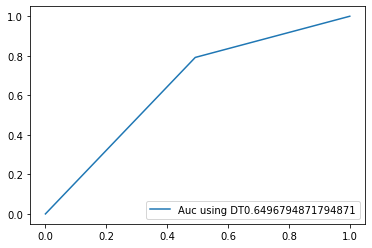

In [48]:
#AUC
predict_DT_pro=DT.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_DT_pro)
AUC=metrics.roc_auc_score(y_test,predict_DT_pro)
plt.plot(fpr,tpr,label="Auc using DT"+str(AUC))
plt.legend(loc=4)
plt.show();

Conclusion=The AUC value is poor but can be improved.

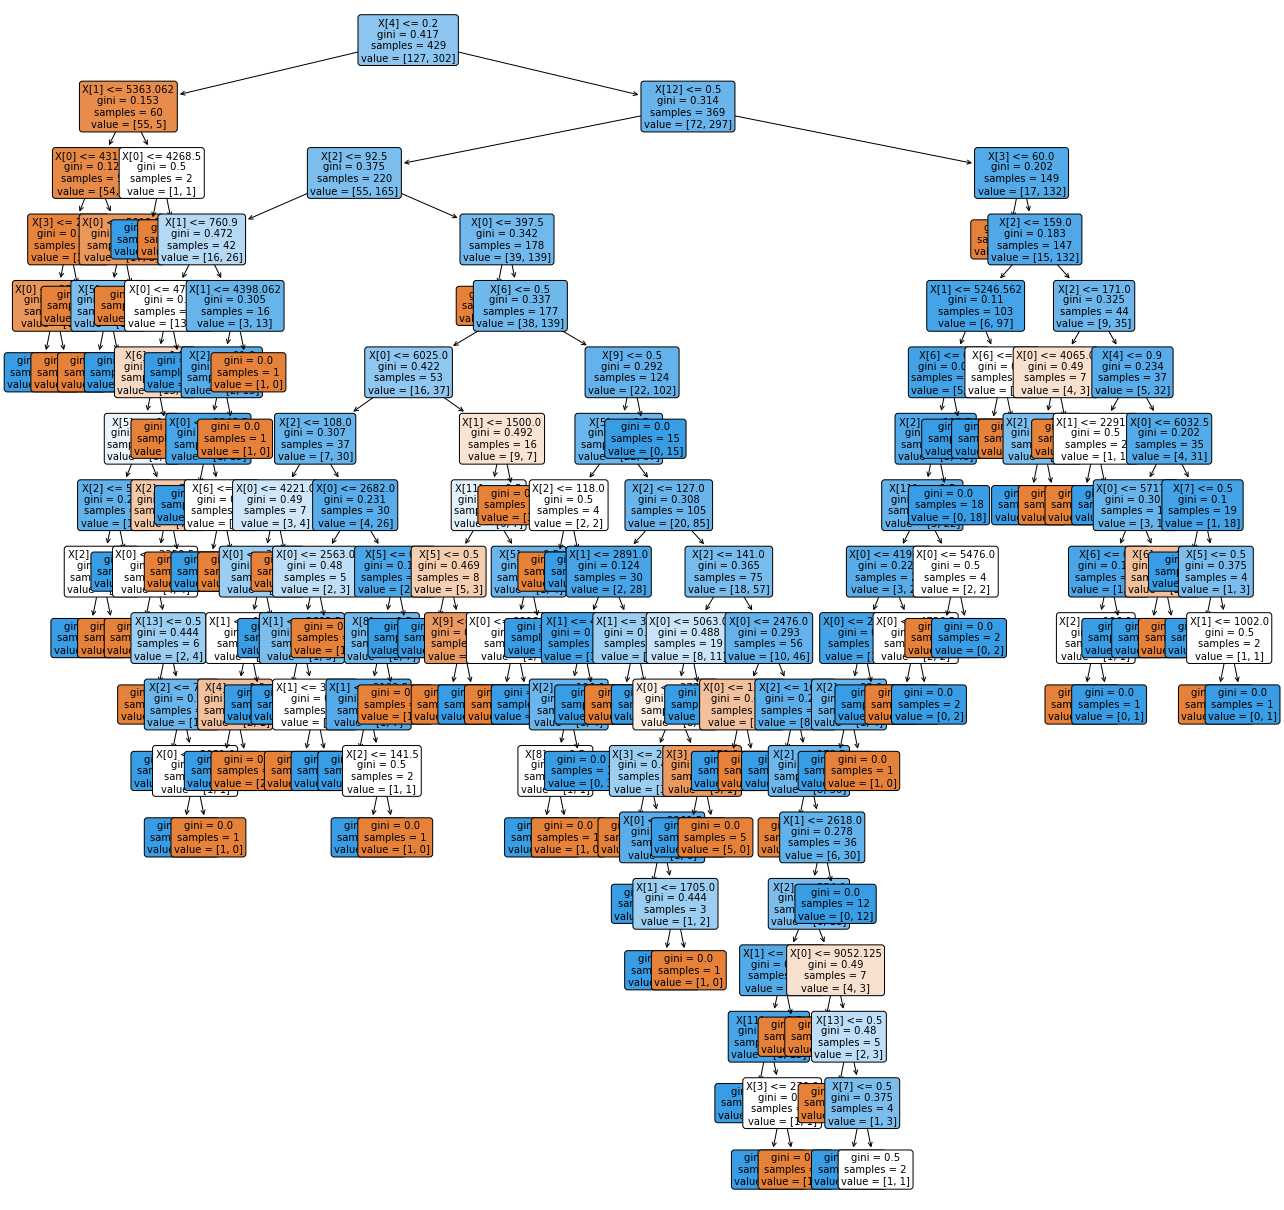

In [49]:
#Tree
plt.figure(figsize=[22,22])
tree.plot_tree(DT,filled=True,rounded=True,fontsize=10);

Conclusion=Pruning needs to be done as we cannot understand anything.

In [50]:
#Pruning
#Parameters
hyper_params=dict(criterion=['gini'],max_depth=[1,5,10,40,50,100,200,300],min_samples_split=[1,5,10,40,50,100,200,300],min_samples_leaf=[1,5,10,40,50,100,200,300])
#Gridsearch
Grid=GridSearchCV(DT,param_grid=hyper_params,scoring="accuracy",cv=10)
#Fit
Grid.fit(X_train,y_train)
#Best estimators
Grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=50)

In [51]:
#Algorthm
DT_HP=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=50)
DT_HP.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=50)

In [52]:
#Traning and Testing score
print("Traning score is",DT_HP.score(X_train,y_train))
print("Testing score is",DT_HP.score(X_test,y_test))

Traning score is 0.8275058275058275
Testing score is 0.7675675675675676


Conclusion=Improvement in testing score.

In [75]:
#Performance parameters
predict_DT_HP=DT_HP.predict(X_test)
print("Accuracy is",metrics.accuracy_score(y_test,predict_DT_HP))
print("Precision is",metrics.precision_score(y_test,predict_DT_HP))
print("Recall is",metrics.recall_score(y_test,predict_DT_HP))
print("f1score is",metrics.f1_score(y_test,predict_DT_HP))

<IPython.core.display.Javascript object>

Accuracy is 0.7675675675675676


<IPython.core.display.Javascript object>

Precision is 0.7619047619047619


<IPython.core.display.Javascript object>

Recall is 0.9333333333333333


<IPython.core.display.Javascript object>

f1score is 0.8389513108614233


Conclusion=Improvement in performance parameters.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

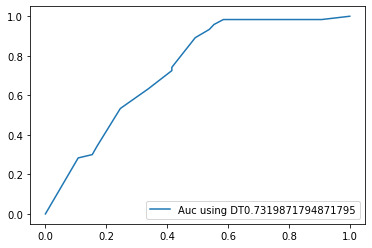

In [54]:
#AUC
predict_DT_pro_HP=DT_HP.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_DT_pro_HP)
AUC=metrics.roc_auc_score(y_test,predict_DT_pro_HP)
plt.plot(fpr,tpr,label="Auc using DT"+str(AUC))
plt.legend(loc=4)
plt.show();

Conclusion=There is improvement in AUC.

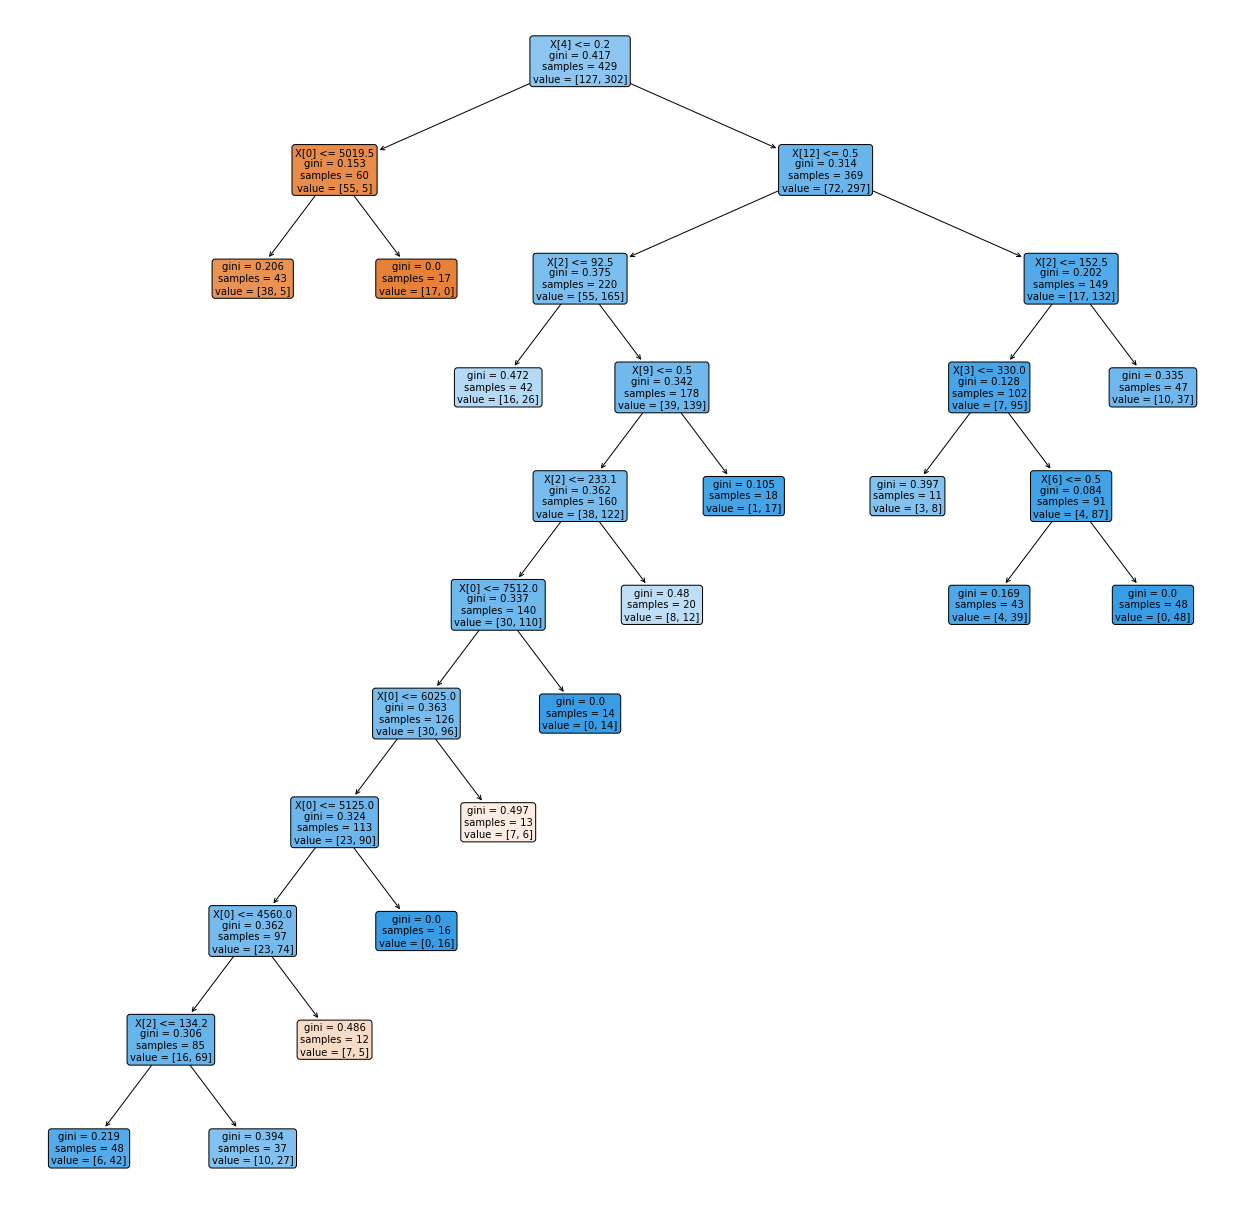

In [55]:
#Tree
plt.figure(figsize=[22,22])
tree.plot_tree(DT_HP,filled=True,rounded=True,fontsize=10);

Conclusion=Better DT.

# Conclusion 

In [83]:
#DataFrame of all alogoritm
summary=pd.DataFrame({"Algorithm":["Logistic Regression","KNN","KNN after HP","NB","SVM","Decision Tree","Decision Tree after HP"],"Accuracy":[0.78,0.56,0.61,0.78,0.64,0.69,0.76],"Precision":[0.76,0.63,0.61,0.75,0.64,0.74,0.76],"Recall":[0.98,0.78,0.90,0.98,1,0.79,0.93],"f1score":[0.858,0.69,0.75,0.855,0.78,0.76,0.83],"AUC":[0.80,0.47,0.53,0.73,0.433,0.64,0.73]})
summary

Algorithm  Accuracy  Precision  Recall  f1score    AUC
0     Logistic Regression      0.78       0.76    0.98    0.858  0.800
1                     KNN      0.56       0.63    0.78    0.690  0.470
2            KNN after HP      0.61       0.61    0.90    0.750  0.530
3                      NB      0.78       0.75    0.98    0.855  0.730
4                     SVM      0.64       0.64    1.00    0.780  0.433
5           Decision Tree      0.69       0.74    0.79    0.760  0.640
6  Decision Tree after HP      0.76       0.76    0.93    0.830  0.730

When we are considering Loan to give or not to give for a bank then, if the bank model is predicting yes and actually its yes then no probleam, if the bank model is predicting no and actually its no then no probleam, if the bank model is predicting yes and actually its no then probleam for bank as they will not get the loan amount back and if the bank model is predicting no and actually its yes then probleam for bank as they will miss on interest amount hence we will consider f1score as deciding factor as we have to consider both FN and FP and reduce both.

LR has highest f1score hence we will consider LR for prediction.